# Project 4: Black Friday Sales

### About the Dataset:

### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high volume products from last month.
### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

#### Answer the following questions:
#### Q1. Check the correlation matrix and identify most correlated features.
#### Q2. Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.
#### Q3. Find out the two most important Principal Components.
#### Q4. Select only 8 features using PCA.

In [69]:
#importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [70]:
#Reading Dataset
data = pd.read_csv("DS C4-Project/Problem Statement - Dimentionality Reduction-Dataset.csv")

In [71]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [72]:
data = data.drop('Product_ID', axis=1)

In [73]:
data.dtypes

User_ID                         int64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [74]:
data.shape

(550068, 11)

In [75]:
#checking sum of missing values in each feature
data.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [76]:
data.isnull().sum()/len(data)*100

User_ID                        0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [77]:
# As Product_Category_3 contains very huge no. of missing values(69%), we'll remove that feature using "Missing Value Ratio"
a = data.isnull().sum()/len(data)*100

In [78]:
variables = data.columns

In [79]:
variable = [ ]
for i in range(data.columns.shape[0]):
    if a[i]<=65:   #setting the threshold as 65%
        variable.append(variables[i])

In [80]:
variable

['User_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase']

In [81]:
data1 = data[variable]

In [82]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,7969


In [83]:
# Product_Category_3 feature has been dropped
data1.shape

(550068, 10)

In [84]:
# For Product_Category_2, we'll take median to adjust missing values
data1 = data1.fillna(data1['Product_Category_2'].median())

In [85]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,M,55+,16,C,4+,0,8,9.0,7969


In [86]:
data1.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [87]:
# Converting categorical data(Gender) into integer ones by using mapping function.
data1['Gender']=data1['Gender'].map({'F':0, 'M':1})

In [88]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,0-17,10,A,2,0,3,9.0,8370
1,1000001,0,0-17,10,A,2,0,1,6.0,15200
2,1000001,0,0-17,10,A,2,0,12,9.0,1422
3,1000001,0,0-17,10,A,2,0,12,14.0,1057
4,1000002,1,55+,16,C,4+,0,8,9.0,7969


In [89]:
#visualizing the unique values of the particular field.
data1.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [90]:
# Mapping the range variable into integer ones.
data1['Age']= data1['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [91]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,A,2,0,3,9.0,8370
1,1000001,0,1,10,A,2,0,1,6.0,15200
2,1000001,0,1,10,A,2,0,12,9.0,1422
3,1000001,0,1,10,A,2,0,12,14.0,1057
4,1000002,1,7,16,C,4+,0,8,9.0,7969


In [92]:
# checking the unique values in the City_Category column
data1['City_Category']= data1['City_Category'].map({'A':1, 'B':2, 'C':3})

In [93]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,1,2,0,3,9.0,8370
1,1000001,0,1,10,1,2,0,1,6.0,15200
2,1000001,0,1,10,1,2,0,12,9.0,1422
3,1000001,0,1,10,1,2,0,12,14.0,1057
4,1000002,1,7,16,3,4+,0,8,9.0,7969


In [94]:
data1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [95]:
# Importing Labelcoder for adjusting 'Stay_In_Current_City_Years' feature
from sklearn.preprocessing import LabelEncoder

In [96]:
le = LabelEncoder()
label_Stay_In_Current_City_Years = le.fit_transform(data1['Stay_In_Current_City_Years'])

In [97]:
data1['Stay_In_Current_City_Years'] = label_Stay_In_Current_City_Years

In [98]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,1,2,0,3,9.0,8370
1,1000001,0,1,10,1,2,0,1,6.0,15200
2,1000001,0,1,10,1,2,0,12,9.0,1422
3,1000001,0,1,10,1,2,0,12,14.0,1057
4,1000002,1,7,16,3,4,0,8,9.0,7969


### Now, Our data has been preprocessed completely

# Question1: Check the correlation matrix and identify most correlated features.

In [99]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,1,2,0,3,9.0,8370
1,1000001,0,1,10,1,2,0,1,6.0,15200
2,1000001,0,1,10,1,2,0,12,9.0,1422
3,1000001,0,1,10,1,2,0,12,14.0,1057
4,1000002,1,7,16,3,4,0,8,9.0,7969


In [100]:
# Dropping Purchase feature as it is the target variable
df = data1.drop('Purchase', axis=1)

In [101]:
df.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001644
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.043503
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691
Product_Category_2,0.001644,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000


In [102]:
corr_matrix = df.corr().abs()

In [103]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [104]:
# Correlation Matrix with upper values
upper

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
User_ID,NaN,0.033474,0.032698,0.023971,0.022859,0.030737,0.020443,0.003825,0.001644
Gender,NaN,NaN,0.004262,0.117291,0.004515,0.014660,0.011603,0.045594,0.014051
Age,NaN,NaN,NaN,0.091463,0.123079,0.004712,0.311738,0.061197,0.043503
Occupation,NaN,NaN,NaN,NaN,0.034479,0.030005,0.024280,0.007618,0.000557
City_Category,NaN,NaN,NaN,NaN,NaN,0.019946,0.039790,0.014364,0.006888
Stay_In_Current_City_Years,NaN,NaN,NaN,NaN,NaN,NaN,0.012819,0.004213,0.001087
Marital_Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019888,0.011526
Product_Category_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331691
Product_Category_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.30)]

In [106]:
to_drop

['Marital_Status', 'Product_Category_2']

In [120]:
new_data = data1.drop(data1[to_drop], axis=1)

In [121]:
new_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Purchase
0,1000001,0,1,10,1,2,3,8370
1,1000001,0,1,10,1,2,1,15200
2,1000001,0,1,10,1,2,12,1422
3,1000001,0,1,10,1,2,12,1057
4,1000002,1,7,16,3,4,8,7969


In [122]:
new_data.shape, data1.shape

((550068, 8), (550068, 10))

### 'Marital_Status', 'Product_Category_2' are the 2 most correlated features

# Question 2. Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE

In [124]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,1,2,0,3,9.0,8370
1,1000001,0,1,10,1,2,0,1,6.0,15200
2,1000001,0,1,10,1,2,0,12,9.0,1422
3,1000001,0,1,10,1,2,0,12,14.0,1057
4,1000002,1,7,16,3,4,0,8,9.0,7969


In [125]:
data1.shape

(550068, 10)

In [126]:
data1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,1,10,1,2,0,3,9.0,8370
1,1000001,0,1,10,1,2,0,1,6.0,15200
2,1000001,0,1,10,1,2,0,12,9.0,1422
3,1000001,0,1,10,1,2,0,12,14.0,1057
4,1000002,1,7,16,3,4,0,8,9.0,7969


In [127]:
#standardising the data
scaler = StandardScaler()
df_scale = scaler.fit_transform(data1)

In [128]:
df_scale = pd.DataFrame(df_scale, columns=data1.columns)

In [129]:
df_scale.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.136401,-0.177973
1,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.846289,1.181756
2,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.136401,-1.561193
3,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.046745,-1.633858
4,-1.752061,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.136401,-0.257805


### Covariance Matrix

In [130]:
d= df_scale.cov()
d

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000002,-0.033475,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001644,0.004716
Gender,-0.033475,1.000002,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051,0.060346
Age,0.032698,-0.004262,1.000002,0.091463,0.123079,-0.004712,0.311739,0.061197,0.043503,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000002,0.034479,0.030005,0.024280,-0.007618,0.000557,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000002,0.019946,0.039791,-0.014364,-0.006888,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000002,-0.012819,-0.004213,-0.001087,0.005422
Marital_Status,0.020443,-0.011603,0.311739,0.024280,0.039791,-0.012819,1.000002,0.019888,0.011526,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000002,0.331692,-0.343704
Product_Category_2,0.001644,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331692,1.000002,-0.156677
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343704,-0.156677,1.000002


### Eigen vector and Eigen values

In [131]:
eigen_values, eigen_vectors = np.linalg.eig(d) 
print("Eigenvector: \n",eigen_vectors,"\n")

Eigenvector: 
 [[ 2.05280822e-02 -8.70878594e-02  1.11110554e-03  2.62077546e-02
   3.73260462e-01  1.80454265e-01 -7.25971694e-01  5.40199915e-01
   2.29533705e-02  6.43443344e-03]
 [-1.27430612e-01 -7.25666133e-02  7.24971477e-03 -3.42222807e-02
  -6.09682490e-01  3.46631514e-01 -1.55980401e-01  7.03456406e-02
   3.09484788e-01  6.00288621e-01]
 [ 1.34403363e-01 -6.59610668e-01  1.62945826e-01 -7.06658912e-01
   6.49817098e-02  1.30661627e-02  1.18329890e-01  3.36662754e-02
  -3.59926010e-02  1.03511831e-02]
 [-3.13740779e-02 -2.54132412e-01 -2.37856925e-02  1.45100571e-01
  -5.84471276e-01  1.67991014e-01 -1.87780005e-01  6.39027166e-02
  -1.66564130e-01 -6.89852375e-01]
 [-4.31832320e-02 -3.31564645e-01  1.59308894e-02  1.76593787e-01
   2.74116120e-02 -4.27231211e-01 -4.90568230e-01 -6.07068136e-01
   2.48430804e-01  5.07568391e-02]
 [-2.11859129e-02 -7.84939994e-03 -7.13559059e-04 -5.61224988e-03
  -2.96908832e-01 -7.91373240e-01  4.08827594e-02  5.23073771e-01
   4.38398655e-04 

In [132]:
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvalues: 
 [1.5837184  1.37925398 0.58912375 0.67007553 1.13221616 1.00670325
 0.98953014 0.94545359 0.82541305 0.87853031] 



In [133]:
eigen_values = pd.DataFrame(eigen_values, index=d.columns)

In [134]:
eigen_values

,0
User_ID,1.583718
Gender,1.379254
Age,0.589124
Occupation,0.670076
City_Category,1.132216
Stay_In_Current_City_Years,1.006703
Marital_Status,0.989530
Product_Category_1,0.945454
Product_Category_2,0.825413
Purchase,0.878530


In [135]:
total_egnvalues = sum(eigen_values[0])

total_egnvalues

10.000018179603583

In [136]:
var_exp = [(i/total_egnvalues) for i in sorted(eigen_values[0], reverse=True)]
var_exp

[0.15837155255056776,
 0.13792514764713645,
 0.11322141051220429,
 0.10067014222332074,
 0.09895283386455182,
 0.09454518720807996,
 0.08785287102153809,
 0.08254115507606327,
 0.0670074316208343,
 0.058912268275703325]

#### From the above values of variance obtained, we can observe that two of the most important Principal Components are User_ID and Gender.

### Classification with PCA- 8 Features

In [137]:
X = df_scale.drop('Purchase', axis=1)
Y = df_scale['Purchase']

In [138]:
#creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, random_state = 10, test_size = 0.25)

In [139]:
# creating random forest regressor model
model = RandomForestRegressor(random_state=1, max_depth=3, n_estimators=100)

In [140]:
pca = PCA().fit(X_train)

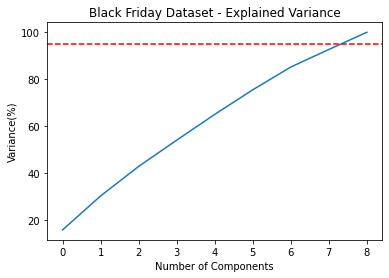

In [141]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)* 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Black Friday Dataset - Explained Variance')
plt.axhline(y=95, color='r', linestyle = '--')
plt.show()

In [142]:
pca = PCA(8).fit(X_train)
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [143]:
X_train_transformed.shape

(412551, 8)

In [144]:
X_valid_transformed.shape

(137517, 8)

In [145]:
model.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=3, random_state=1)

In [146]:
pred_1 = model.predict(X_train_transformed)

In [147]:
pred_2 = model.predict(X_valid_transformed)

In [148]:
MSE(pred_1, y_train)

0.8729193423058577

In [149]:
MSE(pred_2, y_valid)

0.8739620028423317

### Our model performed really well after using PCA technique.